In [ ]:
# Install Geopandas Library that useful for geospatial
!pip install geopandas

## INTRODUCTION GEOSPATIAL

Please note, this one to ingest your dinamic data.

In [6]:
# Import useful library
# Geospatial format -- shapefile, GeoJSON, KML, GPKG
import geopandas as gpd

In [ ]:
# unzip dataset
!unzip "DEC_lands.zip"

In [10]:
# read dataset
full_data = gpd.read_file("DEC_lands/DEClands.shp")
# view the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,UMPURL,SHAPE_AREA,SHAPE_LEN,geometry
0,2743,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,3/11,HERKIMER,739.361639,4239,N,http://www.dec.ny.gov/lands/51309.html,2.992090e+06,14445.172046,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,2744,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,11/08,HERKIMER,7.538903,3841,N,http://www.dec.ny.gov/lands/51309.html,3.050886e+04,870.836410,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,2745,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,8/19,LOWVILLE,76519.233602,4253,N,https://www.dec.ny.gov/lands/22574.html,3.096624e+08,270633.583850,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,2746,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,223.803334,4252,N,https://www.dec.ny.gov/lands/22574.html,9.057000e+05,5609.447134,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,2747,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,114.466837,4019,N,https://www.dec.ny.gov/lands/22574.html,4.632309e+05,2723.724659,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


As you can see in the "CLASS" column, each of the first five rows corresponds to a different forest.

In [11]:
# type of dataset
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [12]:
# select the appropriate data
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [13]:
# How many lands of each type are there?
data.CLASS.value_counts()

WILD FOREST                   963
INTENSIVE USE                 107
PRIMITIVE                      63
WILDERNESS                     52
UNCLASSIFIED                   13
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [14]:
# Select condition subset data "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


## CREATE A SIMPLE MAP

In this part, learn we about visualize the data

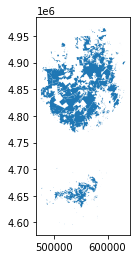

In [16]:
wild_lands.plot();

Every GeoDataFrame contains a special "geometry" column. It contains all of the geometric objects that are displayed when we call the plot() method.

In [17]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((502476.666 4842386.993, 502476.739 4...
1    POLYGON ((502090.747 4840324.577, 502110.011 4...
2    POLYGON ((508503.626 4864992.965, 509092.576 4...
3    POLYGON ((490114.810 4859403.501, 490142.561 4...
4    POLYGON ((481679.514 4853407.042, 481072.554 4...
Name: geometry, dtype: geometry

While this column can contain a variety of different datatypes, each entry will typically be a Point, LineString, or Polygon. The "geometry" column in our dataset contains 2983 different Polygon objects, each corresponding to a different shape in the plot above.

In [ ]:
!unzip "DECptsofinterest1.zip"

In [ ]:
!unzip "DEC_roadstrails.zip"

In [ ]:
!unzip "NYS_Civil_Boundaries.shp.zip"

In [23]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("DECptsofinterest.shp")
campsite = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("DEC_roadstrails/DECroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL']

# County boundaries in New York state (Polygon)
counties = gpd.read_file("Counties.shp")

The plot() method takes as (optional) input several parameters that can be used to customize the appearance. Most importantly, setting a value for ax ensures that all of the information is plotted on the same map.

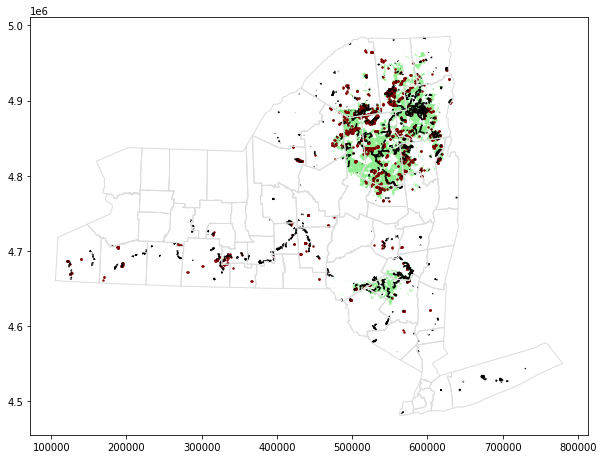

In [25]:
# define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# add wild lands, campsites, and food trails into base map
wild_lands.plot(color='lightgreen', ax=ax)
campsite.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

## EXERCISE

In this part, learn we about in kiva.org

In [ ]:
!unzip "kiva_loans.zip"

In [30]:
world_loans = gpd.read_file('kiva_loans.shp')
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [31]:
# plot by GeoPandas Dataset
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


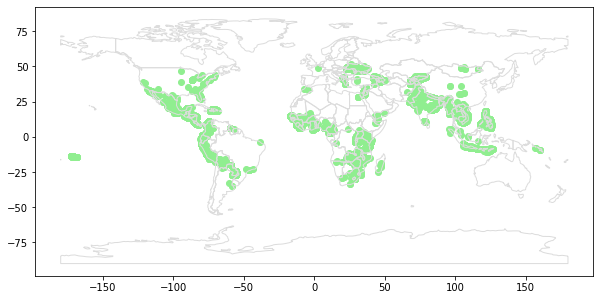

In [34]:
ax = world.plot(figsize=(10,10), color='none',
               edgecolor='gainsboro', zorder=3)
world_loans.plot(color='lightgreen', ax=ax);

In [36]:
# Plotting phl area
PHL_loans = world_loans.loc[world_loans.country == 'Philippines']

# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


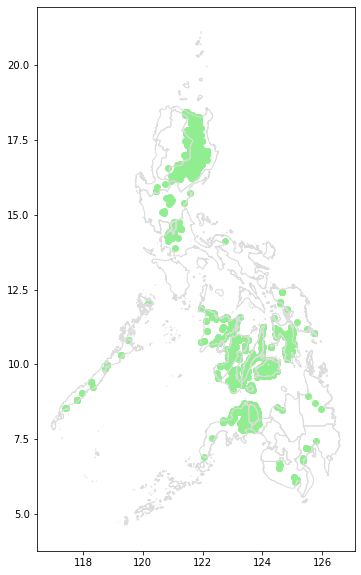

In [38]:
ax = PHL.plot(figsize=(10,10), color='none',
               edgecolor='gainsboro', zorder=3)
PHL_loans.plot(color='lightgreen', ax=ax);